<a id="top"></a>
<div style="text-align: center; background: #FFEB3B; font-family: 'Montserrat', sans-serif; color: #2C6B0C; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    🕋 In the Name of Allah, the Most Beneficent, the Most Merciful 🕋
</div>


<a id="top"></a>
<div style="text-align: center; background: #4CAF50; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    📄 Task 1: Running the Code for Multi-label Emotion Classification from Text 📄
</div>
<div style="font-family: 'Montserrat', sans-serif; margin: 20px; padding: 15px; background: #f0f0f0; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <ol style="font-size: 18px; line-height: 1.6;">
        <li><strong>📚 Import Libraries:</strong> Import all necessary libraries and modules.</li>
        <li><strong>🔄 Download Stopwords:</strong> Ensure the NLTK stopwords are downloaded.</li>
        <li><strong>🔠 Set Stopwords:</strong> Define the stopwords for English.</li>
        <li><strong>🧹 Clean Text Function:</strong> Define a function to clean the input text by removing non-alphabetical characters, converting to lowercase, and removing stopwords.</li>
        <li><strong>📂 Load Dataset:</strong> Load the dataset from the CSV file.</li>
        <li><strong>🧼 Preprocess Data:</strong> Clean the text data.</li>
        <li><strong>🔀 Split Data:</strong> Split the data into training and testing sets.</li>
        <li><strong>🔧 Initialize and Fit TfidfVectorizer:</strong> Initialize the TF-IDF vectorizer and fit it on the training data.</li>
        <li><strong>🔄 Transform Data:</strong> Transform both training and testing data using the vectorizer.</li>
        <li><strong>🤖 Train MultiOutputClassifier Model:</strong> Train the MultiOutputClassifier model.</li>
        <li><strong>💾 Save Model and Vectorizer:</strong> Save the trained model and vectorizer using joblib.</li>
        <li><strong>📈 Evaluate Model:</strong> Predict the labels for the test data and evaluate the model's performance.</li>
    </ol>
</div>


In [39]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# Ensure you have downloaded the stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

In [42]:
# Load the data
data = pd.read_csv('todo_task_multi_label_abstrat_classification_dataset.csv')

In [43]:
data.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0    Predictive models allow subject-specific inf...                 1   
1    Rotation invariance and translation invarian...                 1   
2    We introduce and develop the notion of spher...                 0   
3    The stochastic Landau--Lifshitz--Gilbert (LL...                 0   
4    Fourier-transform infra-red (FTIR) spectra o...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [44]:
# Preprocess the 'ABSTRACT' column
data['ABSTRACT'] = data['ABSTRACT'].apply(clean_text)

In [45]:
data.head()

ID                                              TITLE  \
0   1        Reconstructing Subject-Specific Effect Maps   
1   2                 Rotation Invariance Neural Network   
2   3  Spherical polyharmonics and Poisson kernels fo...   
3   4  A finite element approximation for the stochas...   
4   5  Comparative study of Discrete Wavelet Transfor...   

                                            ABSTRACT  Computer Science  \
0  predictive models allow subjectspecific infere...                 1   
1  rotation invariance translation invariance gre...                 1   
2  introduce develop notion spherical polyharmoni...                 0   
3  stochastic landaulifshitzgilbert llg equation ...                 0   
4  fouriertransform infrared ftir spectra samples...                 1   

   Physics  Mathematics  Statistics  Quantitative Biology  \
0        0            0           0                     0   
1        0            0           0                     0   
2        0            1           0                     0   
3        0            1           0                     0   
4        0            0           1                     0   

   Quantitative Finance  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0

In [46]:
# Separate features and labels
X = data['ABSTRACT']
y = data.drop(columns=['ID', 'TITLE', 'ABSTRACT'])

In [47]:
X

0        predictive models allow subjectspecific infere...
1        rotation invariance translation invariance gre...
2        introduce develop notion spherical polyharmoni...
3        stochastic landaulifshitzgilbert llg equation ...
4        fouriertransform infrared ftir spectra samples...
                               ...                        
20967    machine learning finding increasingly broad ap...
20968    polycrystalline diamond coatings grown cemente...
20969    present new approach identifying situations be...
20970    sum lognormal variates encountered many challe...
20971    recently optional stopping subject debate baye...
Name: ABSTRACT, Length: 20972, dtype: object

In [48]:
y

Computer Science  Physics  Mathematics  Statistics  \
0                     1        0            0           0   
1                     1        0            0           0   
2                     0        0            1           0   
3                     0        0            1           0   
4                     1        0            0           1   
...                 ...      ...          ...         ...   
20967                 1        1            0           0   
20968                 0        1            0           0   
20969                 1        0            0           0   
20970                 0        0            1           1   
20971                 0        0            1           1   

       Quantitative Biology  Quantitative Finance  
0                         0                     0  
1                         0                     0  
2                         0                     0  
3                         0                     0  
4                         0                     0  
...                     ...                   ...  
20967                     0                     0  
20968                     0                     0  
20969                     0                     0  
20970                     0                     0  
20971                     0                     0  

[20972 rows x 6 columns]

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train

16466    investigate hybrid quantumclassical solution m...
4021     paper first prove diophantine system fzfxfyfuf...
17248    recent years many research works propose embed...
17239    singleparticle spectral function measures dens...
2966     investigate focusing coupled ptsymmetric nonlo...
                               ...                        
11284    low rank matrix completion lrmc problem low ra...
11964    consider longterm collisional dynamical evolut...
5390     cooper pairs superconductors normally spin sin...
860      gossip protocols aim arriving means pointtopoi...
15795    userbased collaborative filtering cf one popul...
Name: ABSTRACT, Length: 16777, dtype: object

In [51]:
X_test

20257    layer normalization recently introduced techni...
482      susceptibility propagation constructed combini...
4189     propose new model formalizing reward collectio...
9838     study covariances positive definite functions ...
16591    modularity maximization using greedy algorithm...
                               ...                        
14740    speckle reduction longstanding topic synthetic...
3755     crosscorrelations activity neural networks com...
10684    k borsuk topological conference moscow introdu...
16274    part fornax deep survey eso vlt survey telesco...
14452    majority online content written languages engl...
Name: ABSTRACT, Length: 4195, dtype: object

In [52]:
# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [53]:
vectorizer

TfidfVectorizer(max_features=5000)

In [54]:
X_train_tfidf

<16777x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 960125 stored elements in Compressed Sparse Row format>

In [63]:
X_test_tfidf

<4195x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 238373 stored elements in Compressed Sparse Row format>

In [64]:
# Initialize and train the model
model = MultiOutputClassifier(LogisticRegression())
model.fit(X_train_tfidf, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [65]:
# Save the model and vectorizer to disk
joblib.dump(model, 'multi_label_abstract_classification_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [66]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [67]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.6407628128724672
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1692
           1       0.94      0.81      0.87      1226
           2       0.88      0.74      0.80      1150
           3       0.82      0.64      0.72      1069
           4       0.69      0.07      0.13       122
           5       0.83      0.11      0.20        45

   micro avg       0.86      0.74      0.80      5304
   macro avg       0.83      0.53      0.59      5304
weighted avg       0.86      0.74      0.79      5304
 samples avg       0.81      0.78      0.78      5304



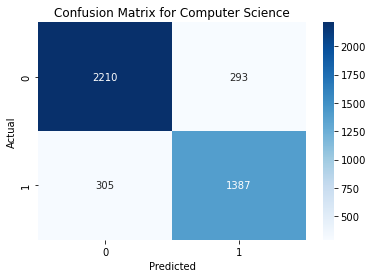

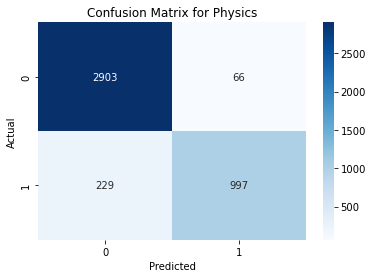

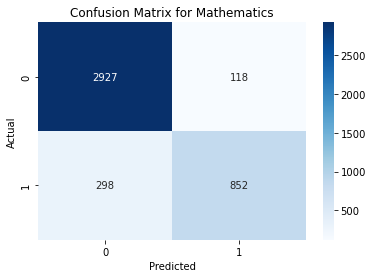

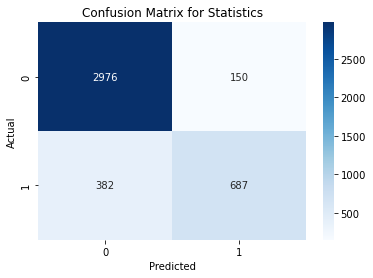

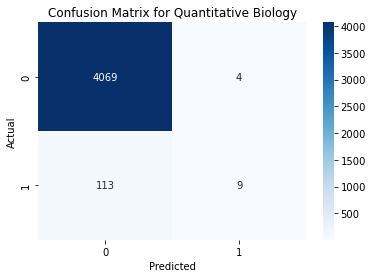

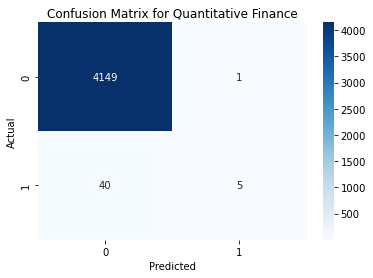

In [68]:
# Generate and display a confusion matrix for each label
for i, label in enumerate(y.columns):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

<a id="top"></a>
<div style="text-align: center; background: #4CAF50; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    📄 Take user input for prediction📄
</div>

In [82]:
# Take user input for prediction
user_input = input("Please enter your text: ").strip()

Please enter your text: This new algorithm in computer science is groundbreaking and will revolutionize the industry.


In [83]:
# Preprocess the user input
def preprocess_user_input(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

cleaned_input = preprocess_user_input(user_input)

In [84]:
# Transform the cleaned input using the vectorizer
user_input_tfidf = vectorizer.transform([cleaned_input])

In [85]:
# Predict the labels for the user input
user_prediction = model.predict(user_input_tfidf)

In [86]:
# Define a function to get the predicted labels
def get_predicted_labels(predictions, labels):
    predicted_labels = []
    for pred, label in zip(predictions[0], labels):
        if pred == 1:
            predicted_labels.append(label)
    return predicted_labels

In [88]:
# Get the predicted labels
predicted_labels = get_predicted_labels(user_prediction, y.columns)
print("="*50)
print("✨ Multi-Label Text Classification System ✨")
print("="*50)



print("\n" + "="*50)
print(f"📝 Input Text: \n{user_input}")
print("\n" + "="*50)
print(f"🔍 The predicted labels for the input '{user_input}' are: {', '.join(predicted_labels) if predicted_labels else 'None'}")

print("="*50)

✨ Multi-Label Text Classification System ✨

📝 Input Text: 
This new algorithm in computer science is groundbreaking and will revolutionize the industry.

🔍 The predicted labels for the input 'This new algorithm in computer science is groundbreaking and will revolutionize the industry.' are: Computer Science


<a id="top"></a>
<div style="text-align: center; background: #FFEB3B; font-family: 'Montserrat', sans-serif; color: #2C6B0C; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    🌟 Jazak Allah Khair 🌟
</div>
